<a href="https://colab.research.google.com/github/raultyv/Machine_learning/blob/main/Proyecto1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
###############################################################################
#### Proyecto 1: Machine learning  ############################################
#### Paper: Comparison of machine learning algorithm for Santander dataset  ###
###############################################################################
#### Integrantes  #############################################################
#### -
#### -
#### -
#### -
###############################################################################

## Paso 1: Importar los dateset enviados por el profesor
import pandas as pd
import numpy as np

# 1.1 Definir las rutas (al estar en la raíz de la carpeta 'Files', la ruta es directa)
train_path = '/content/train.csv'
test_path = '/content/test.csv'

# 1.2 Cargar los datos
# El paper menciona que trabajamos con 200,000 registros por archivo
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.head()
test_df.head()

print(f"¡Carga completada desde el almacenamiento local!")
print(f"Registros cargados: {len(train_df)}")

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [9]:
# --- PASO 2: PREPROCESAMIENTO ---
# Según el paper: Normalización técnica usando el método de transformación de rango (0 y 1)

from sklearn.preprocessing import MinMaxScaler

# 1. Separamos las features (X) del target (y)
# El paper indica que hay 200 variables predictoras
X = train_df.drop(['ID_code', 'target'], axis=1) #quitamos las columnas que no son features
y = train_df['target'] #identificamos el target

# 2. Configuramos el escalador para el rango [0, 1] segun el paper
scaler = MinMaxScaler(feature_range=(0, 1))

print("Iniciando normalización de las 200 variables...")
X_scaled = scaler.fit_transform(X)

# 3. Lo convertimos a DataFrame para mantener el orden de las columnas
X_final = pd.DataFrame(X_scaled, columns=X.columns)

print("¡Preprocesamiento completado!")
print(f"Nuevo valor mínimo de var_0: {X_final['var_0'].min()}")
print(f"Nuevo valor máximo de var_0: {X_final['var_0'].max()}")

Iniciando normalización de las 200 variables...
¡Preprocesamiento completado!
Nuevo valor mínimo de var_0: 0.0
Nuevo valor máximo de var_0: 0.9999999999999999


Entrenando Regresión Logística con balanceo de clases...


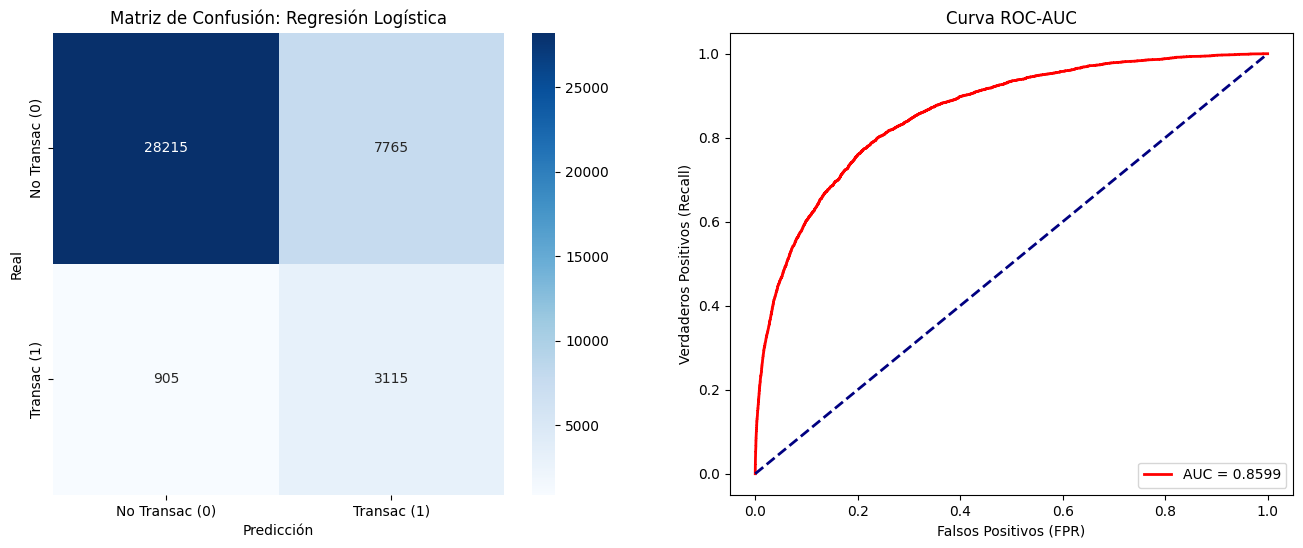


REPORTE DE CLASIFICACIÓN (Métricas Críticas)
              precision    recall  f1-score   support

           0       0.97      0.78      0.87     35980
           1       0.29      0.77      0.42      4020

    accuracy                           0.78     40000
   macro avg       0.63      0.78      0.64     40000
weighted avg       0.90      0.78      0.82     40000

ROC-AUC GLOBAL: 0.8599


In [15]:
################################################################################
#### Modelo 1 - Regresión Logística  ###########################################
################################################################################
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. PREPARACIÓN DE DATOS ---
# Usamos X_final (normalizado) y 'y' (target)
# Separamos el 20% para validar la calidad del modelo
X_train, X_val, y_train, y_val = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

# --- 2. IMPLEMENTACIÓN DE REGRESIÓN LOGÍSTICA ---
# NOTA: 'class_weight="balanced"' para no peder los casos que si transaccionan
model_lr = LogisticRegression(
    solver='lbfgs',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

print("Entrenando Regresión Logística con balanceo de clases...")
model_lr.fit(X_train, y_train)

# --- 3. PREDICCIONES ---
y_pred = model_lr.predict(X_val)
y_proba = model_lr.predict_proba(X_val)[:, 1]

# --- 4. VISUALIZACIÓN SEGÚN RÚBRICA ---
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0],
            xticklabels=['No Transac (0)', 'Transac (1)'],
            yticklabels=['No Transac (0)', 'Transac (1)'])
ax[0].set_title('Matriz de Confusión: Regresión Logística')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Real')

# Curva ROC
fpr, tpr, _ = roc_curve(y_val, y_proba)
auc_score = roc_auc_score(y_val, y_proba)
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'AUC = {auc_score:.4f}')
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_title('Curva ROC-AUC')
ax[1].set_xlabel('Falsos Positivos (FPR)')
ax[1].set_ylabel('Verdaderos Positivos (Recall)')
ax[1].legend(loc="lower right")

plt.show()

# --- 5. REPORTE DE MÉTRICAS ---
print("\n" + "="*60)
print("REPORTE DE CLASIFICACIÓN (Métricas Críticas)")
print("="*60)
print(classification_report(y_val, y_pred))
print(f"ROC-AUC GLOBAL: {auc_score:.4f}")